In [46]:
import numpy as np
import os
import sys
import cv2 
import matplotlib.pyplot as plt
import pickle
import random
import pandas as pd

import seaborn as sns
import tensorflow as tf
from tensorflow.keras import  Model,Sequential
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten,Conv2D,MaxPooling2D
import pickle
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
# Read given data-set using pandas

df = pd.read_csv("cancel/train.csv")
print("Shape of train_data : ", df.shape)
df.head(3)

Shape of train_data :  (450000, 20)


,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
0,2021-01-26 02:21:35,556753,2021-01-26 00:00:00,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,NaN,NaN,NaN,NaN
1,2021-01-26 02:33:16,556754,2021-01-26 00:00:00,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,NaN,NaN,NaN,3.266667,NaN
2,2021-01-26 02:39:49,556755,2021-01-26 00:00:00,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,NaN,NaN,NaN,9.816667,NaN


In [48]:
# Read given data-set using pandas

text_data = pd.read_csv("cancel/test.csv")
print("Shape of text_data : ", text_data.shape)
text_data.head(3)

Shape of text_data :  (144844, 16)


,order_time,order_id,order_date,allot_time,accept_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time
0,2021-02-06 10:03:24,130231,2021-02-06 00:00:00,2021-02-06 10:03:49,2021-02-06 10:04:15,12884,1.6585,4.54,216.0,215.0,1.0,747.0,NaN,NaN,NaN,273.400000
1,2021-02-06 10:03:26,130232,2021-02-06 00:00:00,2021-02-06 10:03:27,2021-02-06 10:03:36,3541,2.0709,5.84,52.0,52.0,0.0,75.0,NaN,NaN,NaN,252.100000
2,2021-02-06 10:03:27,130233,2021-02-06 00:00:00,2021-02-06 10:04:14,2021-02-06 10:05:34,603,1.3884,0.99,289.0,289.0,0.0,2214.0,NaN,NaN,NaN,241.383333


In [49]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
order_id,450000.0,369143.080767,131146.906408,118350.000000,257342.750000,369842.5000,482342.250000,594842.000000
rider_id,450000.0,7763.244016,5592.880135,0.000000,2805.000000,6754.0000,11965.000000,21566.000000
first_mile_distance,450000.0,1.229889,0.846183,0.000134,0.539575,1.1387,1.853000,42.038100
last_mile_distance,450000.0,2.968873,1.884124,0.000000,1.470000,2.6700,4.220000,22.410000
alloted_orders,433052.0,104.620909,90.135492,1.000000,36.000000,81.0000,147.000000,567.000000
delivered_orders,432659.0,103.950448,89.639646,1.000000,36.000000,81.0000,146.000000,562.000000
cancelled,450000.0,0.011596,0.107057,0.000000,0.000000,0.0000,0.000000,1.000000
undelivered_orders,432659.0,0.764165,1.066473,0.000000,0.000000,0.0000,1.000000,9.000000
lifetime_order_count,449947.0,853.640664,1502.976162,0.000000,165.000000,396.0000,948.000000,30469.000000
reassigned_order,13753.0,1.000000,0.000000,1.000000,1.000000,1.0000,1.000000,1.000000


In [50]:
text_data.isnull().sum()

order_time                   0
order_id                     0
order_date                   0
allot_time                   0
accept_time                 68
rider_id                     0
first_mile_distance          0
last_mile_distance           0
alloted_orders            4773
delivered_orders          4884
undelivered_orders        4884
lifetime_order_count       778
reassignment_method     140212
reassignment_reason     140209
reassigned_order        140209
session_time              5054
dtype: int64

In [51]:
df.isnull().sum()

order_time                   0
order_id                     0
order_date                   0
allot_time                   0
accept_time                157
pickup_time               2421
delivered_time            5218
rider_id                     0
first_mile_distance          0
last_mile_distance           0
alloted_orders           16948
delivered_orders         17341
cancelled                    0
undelivered_orders       17341
lifetime_order_count        53
reassignment_method     436256
reassignment_reason     436247
reassigned_order        436247
session_time              3675
cancelled_time          444782
dtype: int64

In [52]:
df.drop('pickup_time', axis=1,inplace = True)
df.drop('delivered_time', axis=1,inplace = True)
df.drop('cancelled_time', axis=1,inplace = True)

In [53]:
df.isnull().sum()

order_time                   0
order_id                     0
order_date                   0
allot_time                   0
accept_time                157
rider_id                     0
first_mile_distance          0
last_mile_distance           0
alloted_orders           16948
delivered_orders         17341
cancelled                    0
undelivered_orders       17341
lifetime_order_count        53
reassignment_method     436256
reassignment_reason     436247
reassigned_order        436247
session_time              3675
dtype: int64

In [54]:
df.drop('reassignment_method', axis=1,inplace = True)
df.drop('reassignment_reason', axis=1,inplace = True)
df.drop('reassigned_order', axis=1,inplace = True)

In [55]:
df['order_time'] = pd.to_datetime(df['order_time']).astype(np.int64)
df['order_date'] = pd.to_datetime(df['order_date']).astype(np.int64)
df['allot_time'] = pd.to_datetime(df['allot_time']).astype(np.int64)
df['accept_time'] = pd.to_datetime(df['accept_time']).astype(np.int64)

In [56]:
df.dropna(inplace=True)
df.isnull().sum()

order_time              0
order_id                0
order_date              0
allot_time              0
accept_time             0
rider_id                0
first_mile_distance     0
last_mile_distance      0
alloted_orders          0
delivered_orders        0
cancelled               0
undelivered_orders      0
lifetime_order_count    0
session_time            0
dtype: int64

In [57]:
text_data.drop('reassignment_method', axis=1,inplace = True)
text_data.drop('reassignment_reason', axis=1,inplace = True)
text_data.drop('reassigned_order', axis=1,inplace = True)

In [59]:
df.shape


(429315, 14)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429315 entries, 1 to 449999
Data columns (total 14 columns):
order_time              429315 non-null int64
order_id                429315 non-null int64
order_date              429315 non-null int64
allot_time              429315 non-null int64
accept_time             429315 non-null int64
rider_id                429315 non-null int64
first_mile_distance     429315 non-null float64
last_mile_distance      429315 non-null float64
alloted_orders          429315 non-null float64
delivered_orders        429315 non-null float64
cancelled               429315 non-null int64
undelivered_orders      429315 non-null float64
lifetime_order_count    429315 non-null float64
session_time            429315 non-null float64
dtypes: float64(7), int64(7)
memory usage: 49.1 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE08900828>,
      dtype=object)

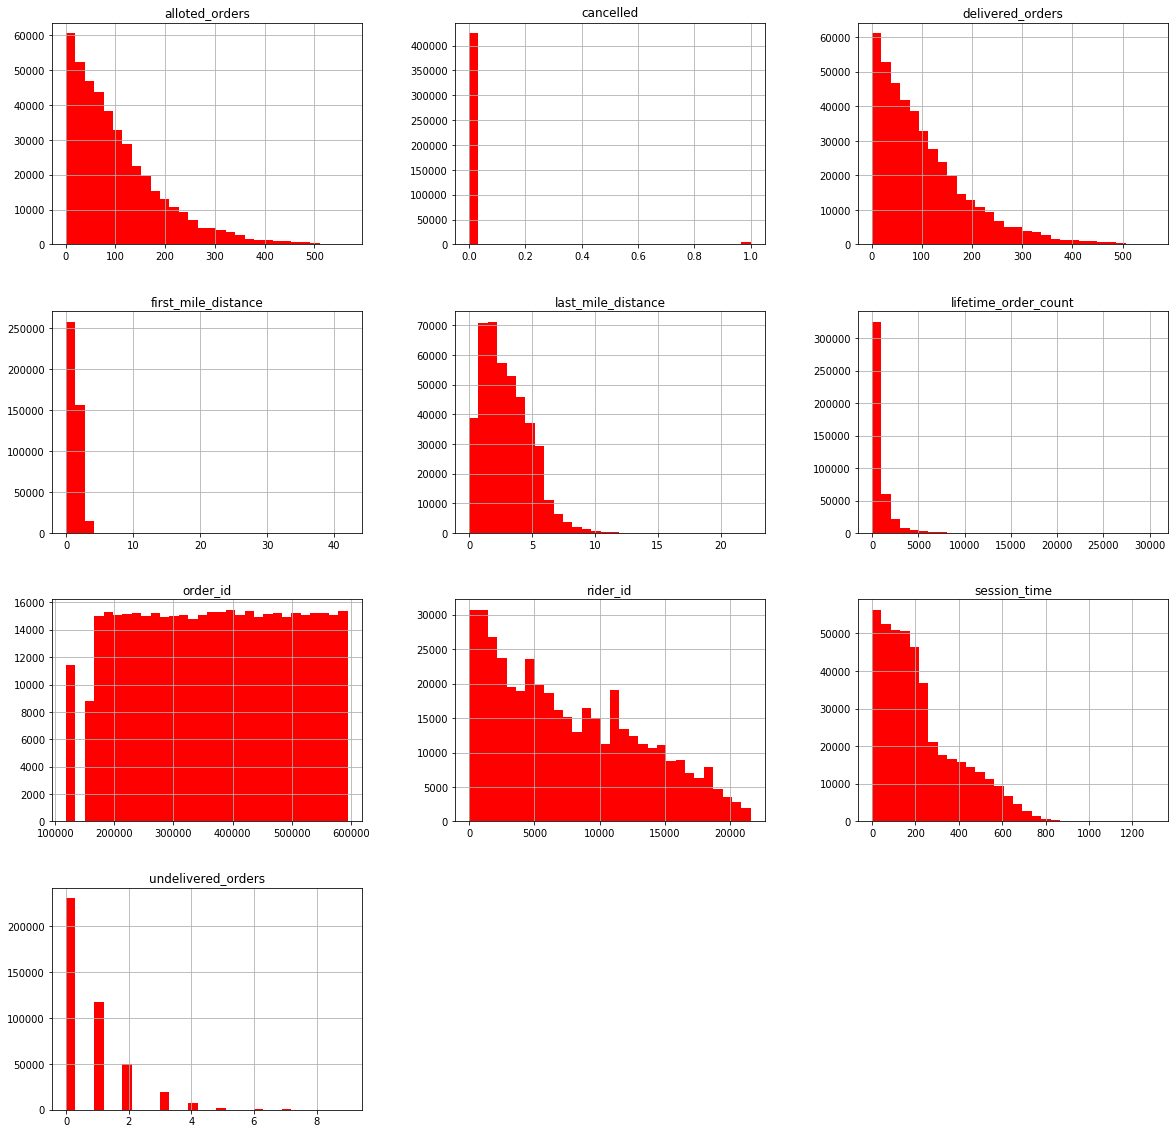

In [14]:
df.hist(bins = 30 , figsize= (20,20) , color = 'r')

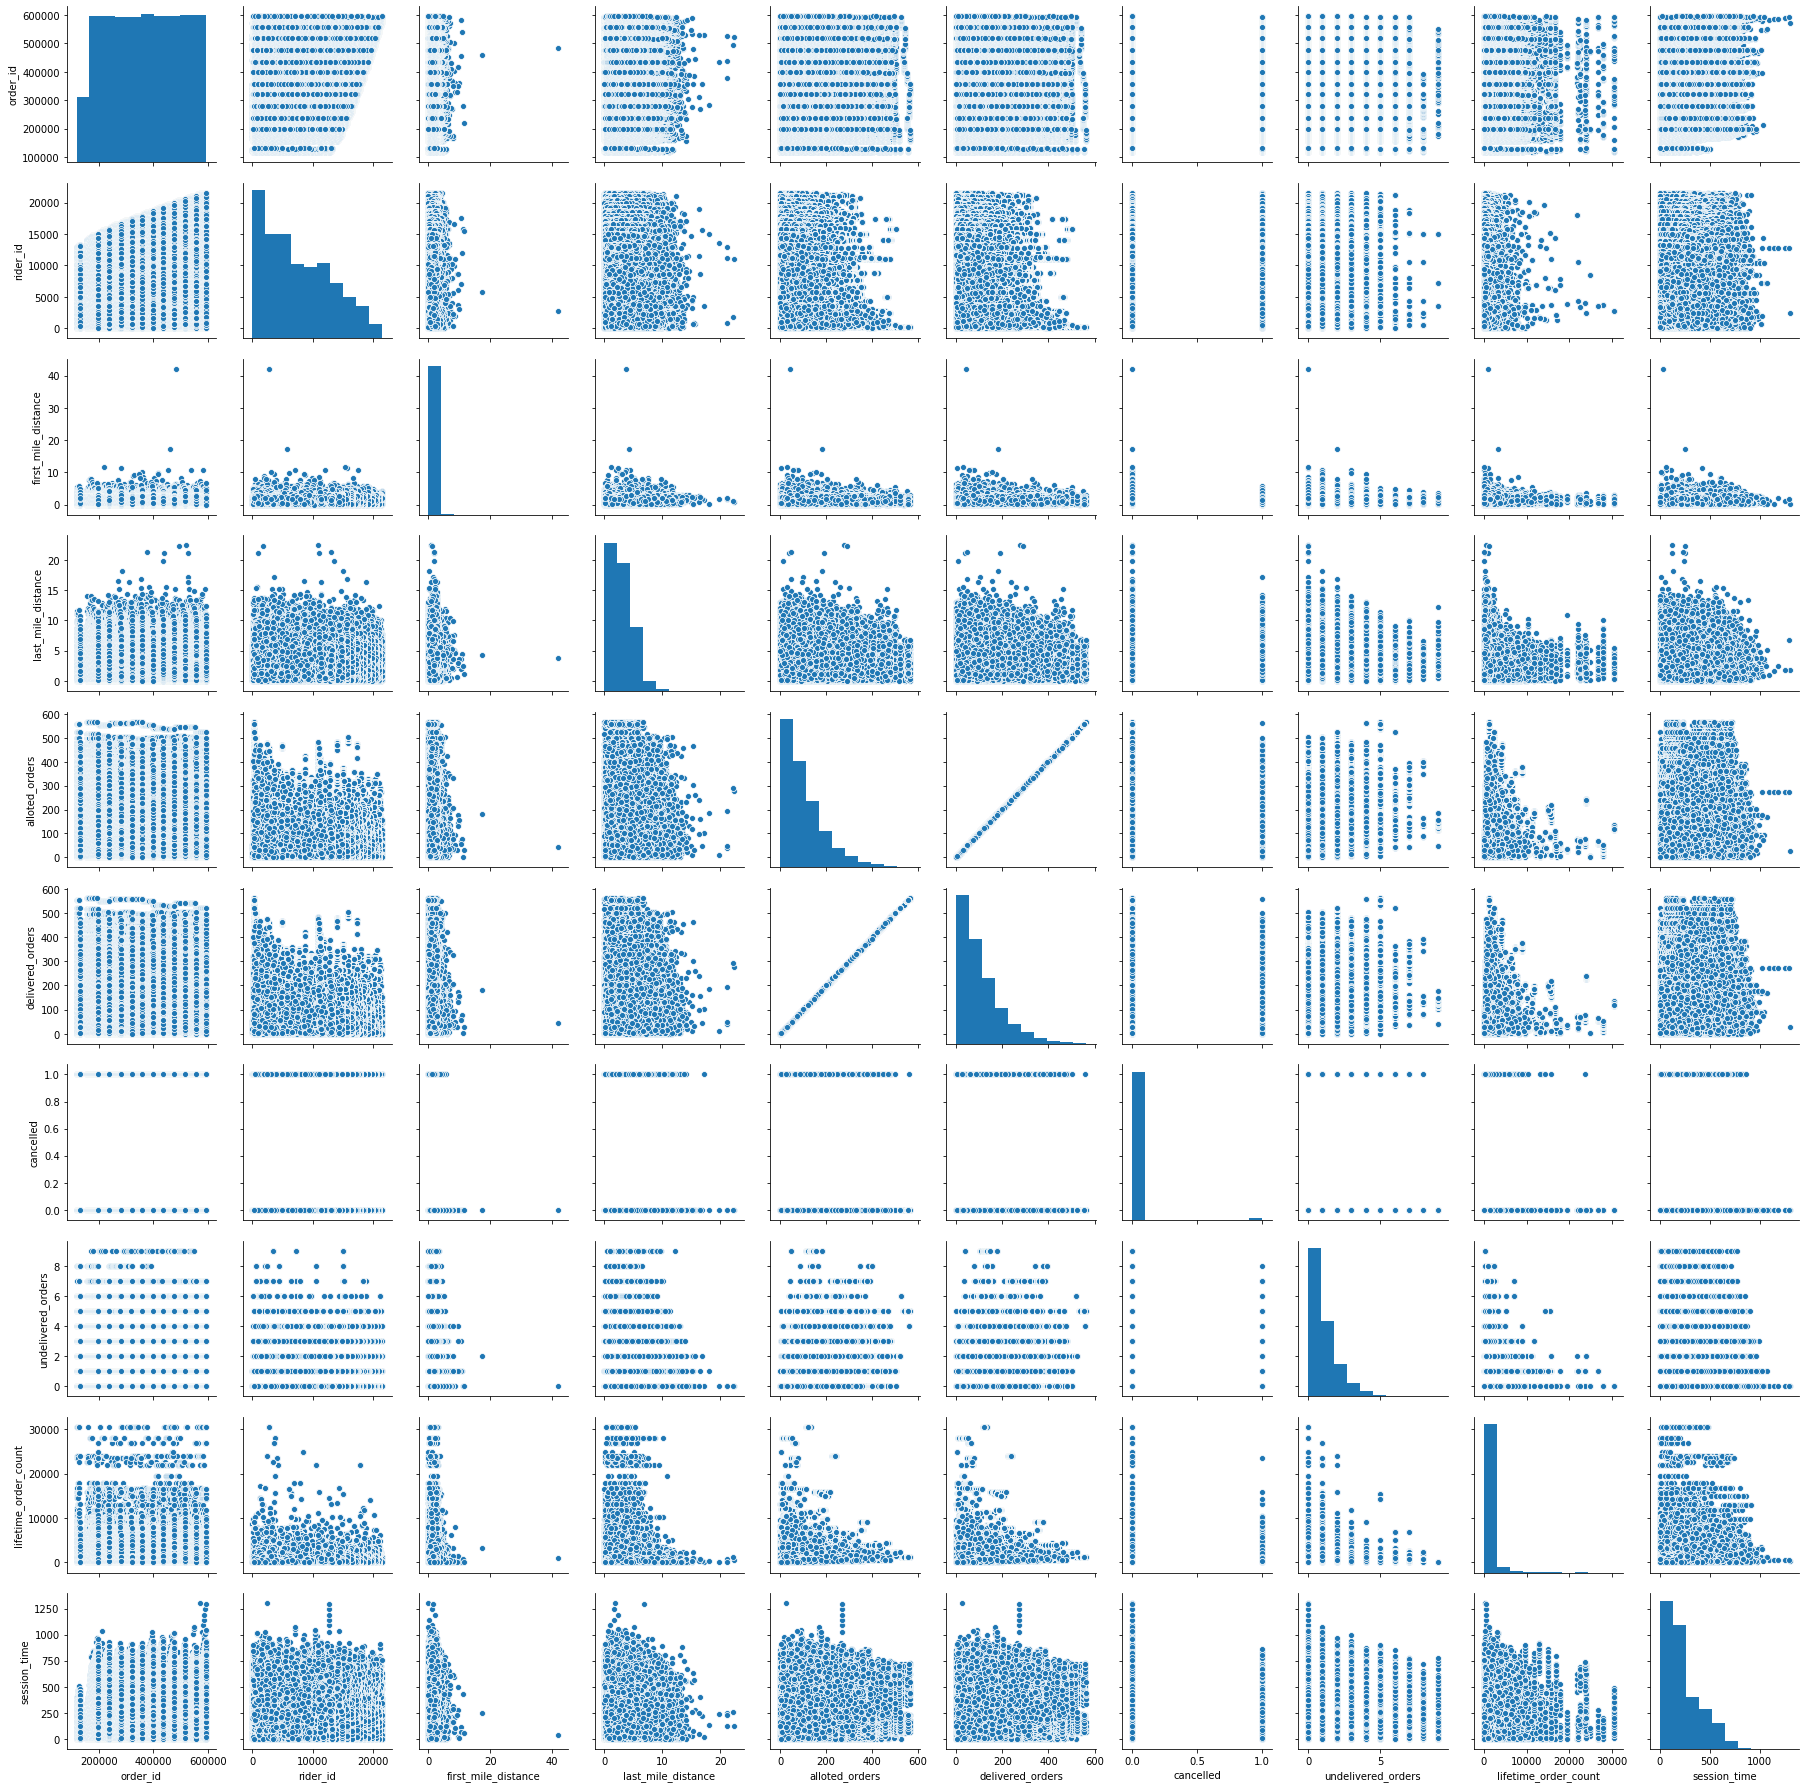

In [15]:
sns.pairplot(df)

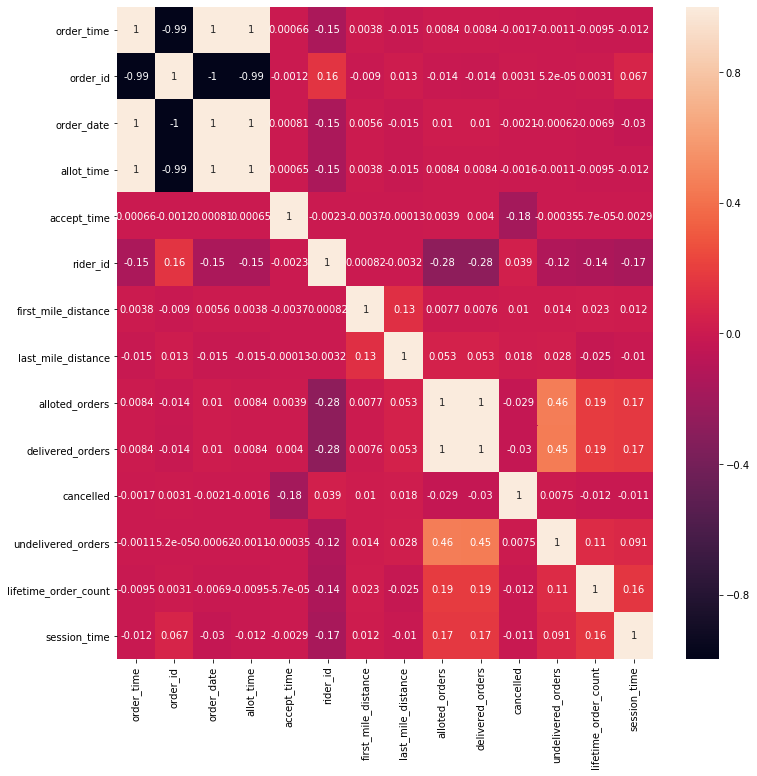

In [61]:
corr_matrix = df.corr()
plt.figure(figsize= (12,12))
sns.heatmap(corr_matrix,annot= True)
plt.show()

In [62]:
X = df.drop(columns = ['cancelled'])
y = df['cancelled']
X.shape
y.shape

(429315,)

In [1]:
X = np.array(X)
y = np.array(y)

NameError: name 'np' is not defined

In [64]:
y = y.reshape(-1,1)
y.shape

(429315, 1)

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)
print(X_train.shape); print(X_test.shape)

(343452, 13)
(85863, 13)


In [67]:
# data preprocessing
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier



m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_predicted 

[10:47:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [69]:
accuracy_RandomForest = xgb.score(X_test,y_test)
accuracy_RandomForest

0.9904266098319415

In [ ]:
xgb_predicted = xgb.predict(X_test)

In [72]:

text_data['order_time'] = pd.to_datetime(text_data['order_time']).astype(np.int64)
text_data['order_date'] = pd.to_datetime(text_data['order_date']).astype(np.int64)
text_data['allot_time'] = pd.to_datetime(text_data['allot_time']).astype(np.int64)
text_data['accept_time'] = pd.to_datetime(text_data['accept_time']).astype(np.int64)

In [75]:
xgb_predicted = xgb.predict(text_data)

In [76]:
df_2 = pd.DataFrame({'order_id':text_data['order_id'],'cancelled':xgb_predicted})
df_2.to_csv('submission.csv',index=False)